# Import libraries

In [1]:
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 
import tensorflow as tf

# Load CIFAR-10 dataset

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


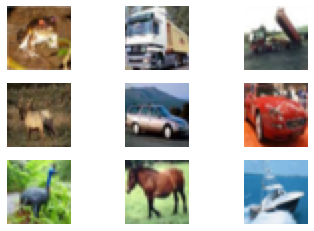

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,3)
for i in range(0, 3):
  for j in range(0, 3):
    axes[i,j].imshow(X_train[i*3 + j])
    axes[i,j].axis('off')

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

num_classes = y_train.shape[1]
print('Number of classes: ' + str(num_classes))

Number of classes: 10


# Model creation

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [8]:

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
391/391 [==============================] - 6s 15ms/step - loss: 0.4539 - accuracy: 0.8395
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 0.4311 - accuracy: 0.8474
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3962 - accuracy: 0.8587
Epoch 4/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3735 - accuracy: 0.8675
Epoch 5/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3536 - accuracy: 0.8735
Epoch 6/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3407 - accuracy: 0.8784
Epoch 7/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3179 - accuracy: 0.8884
Epoch 8/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3104 - accuracy: 0.8904
Epoch 9/100
391/391 [==============================] - 6s 15ms/step - loss: 0.2905 - accuracy: 0.8964
Epoch 10/100
391/391 [==============================] - 6s 15ms/step - loss: 0.286

In [12]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.76%
